In [130]:
import numpy as np
import pandas as pd
import math
from scipy import stats
import seaborn as sns
import matplotlib.pyplot as plt

In [131]:
train = pd.read_csv('AMES_TRAIN.csv')
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2039 entries, 0 to 2038
Data columns (total 81 columns):
SubClass         2039 non-null int64
Zoning           2039 non-null object
LotFrontage      1714 non-null float64
LotArea          2039 non-null int64
Street           2039 non-null object
Alley            146 non-null object
LotShape         2039 non-null object
LandContour      2039 non-null object
Utilities        2039 non-null object
LotConfig        2039 non-null object
LandSlope        2039 non-null object
Neighborhood     2039 non-null object
Condition1       2039 non-null object
Condition2       2039 non-null object
BldgType         2039 non-null object
HouseStyle       2039 non-null object
OverallQual      2039 non-null int64
OverallCond      2039 non-null int64
YearBuilt        2039 non-null int64
YearRemodel      2039 non-null int64
RoofStyle        2039 non-null object
RoofMat          2039 non-null object
Exterior1        2039 non-null object
Exterior2        2039 non

In [132]:
train.skew()

SubClass          1.359068
LotFrontage       1.324939
LotArea          13.440253
OverallQual       0.236762
OverallCond       0.630925
YearBuilt        -0.573914
YearRemodel      -0.441998
MasVnrArea        2.601839
BsmtFinSF1        1.482461
BsmtFinSF2        4.164721
BsmtUnfSF         0.942110
TotalBsmtSF       1.112250
FirstFlrSF        1.330116
SecondFlrSF       0.876115
LowQualFinSF     10.216197
GrLivArea         1.300669
BsmtFullBath      0.642910
BsmtHalfBath      4.038597
FullBath          0.122252
HalfBath          0.695178
BedroomAbvGr      0.295567
KitchenAbvGr      4.413040
TotRmsAbvGrd      0.706435
Fireplaces        0.808304
GarageYrBlt      -0.260062
GarageCars       -0.218393
GarageArea        0.263416
WoodDeckSF        1.592101
OpenPorchSF       2.587807
EnclosedPorch     3.288317
ThreeSsnPorch    10.902690
ScreenPorch       4.005293
PoolArea         15.522422
MiscVal          20.189763
MoSold            0.184525
YrSold            0.114740
SalePrice         1.767097
i

In [133]:
train_d = train.copy()
train_d = pd.get_dummies(train_d)

In [134]:
keep_cols = train_d.select_dtypes(include=['number']).columns
train_d = train_d[keep_cols]

In [135]:
train_d = train_d.fillna(train_d.mean())

In [136]:
test = pd.read_csv('AMES_TEST_SFAM.csv')

In [137]:
test_d = test.copy()
test_d = pd.get_dummies(test_d)

In [138]:
test_d = test_d.fillna(test_d.mean())

In [139]:
for col in keep_cols:
    if col not in test_d:
        test_d[col] = 0

In [140]:
test_d = test_d[keep_cols]

In [141]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

In [142]:
#rf_test = RandomForestRegressor(max_depth=30, n_estimators=500, max_features = 100, oob_score=True, random_state=1234)
#cv_score = cross_val_score(rf_test, train_d.drop('SalePrice', axis = 1), train_d['SalePrice'], cv = 5, n_jobs = -1)

In [143]:
#print('CV Score is: '+ str(np.mean(cv_score)))

In [144]:
train_0 = train.copy()

In [145]:
null_index = train_0.LotFrontage.isnull()
train_0.loc[null_index,'LotFrontage'] = 0

In [146]:
train_0 = pd.get_dummies(train_0)

In [147]:
keep_cols = train_0.select_dtypes(include=['number']).columns
train_0 = train_0[keep_cols]

In [148]:
train_0 = train_0.fillna(train_0.mean())

In [149]:
#rf_test = RandomForestRegressor(max_depth=30, n_estimators=500, max_features = 100, oob_score=True, n_jobs=-1, random_state=1234)
#cv_score = cross_val_score(rf_test, train_0.drop('SalePrice', axis = 1), train_0['SalePrice'], cv = 5, n_jobs=-1)

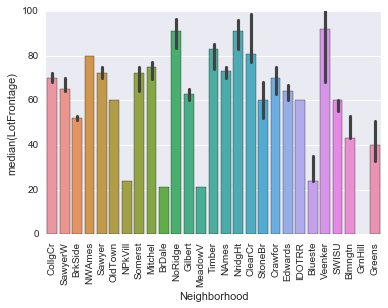

In [150]:
sns.barplot(data=train,x='Neighborhood',y='LotFrontage', estimator=np.median)
plt.xticks(rotation=90)
plt.show()
plt.gcf().clear()

In [151]:
gb_neigh_LF = train['LotFrontage'].groupby(train['Neighborhood'])

In [152]:
train_LFm = train.copy()

In [153]:
# for the key (the key is neighborhood in this case), and the group object (group is LotFrontage grouped by Neighborhood) 
# associated with it...
for key,group in gb_neigh_LF:
    # find where we are both simultaneously missing values and where the key exists
    lot_f_nulls_nei = train['LotFrontage'].isnull() & (train['Neighborhood'] == key)
    # fill in those blanks with the median of the key's group object
    train_LFm.loc[lot_f_nulls_nei,'LotFrontage'] = group.median()

In [154]:
train_LFm = pd.get_dummies(train_LFm)

In [155]:
keep_cols = train_LFm.select_dtypes(include=['number']).columns
train_LFm = train_LFm[keep_cols]

In [156]:
train_LFm = train_LFm.fillna(train_LFm.mean())

In [157]:
#rf_test = RandomForestRegressor(max_depth=30, n_estimators=500, max_features = 100, oob_score=True, n_jobs=-1, random_state= 1234)
#cv_score = cross_val_score(rf_test, train_LFm.drop('SalePrice', axis = 1), train_LFm['SalePrice'], cv = 5, n_jobs=-1)

In [158]:
#print('CV Score is: '+ str(np.mean(cv_score)))

In [159]:
train_med = train.copy()

In [160]:
# for the key (the key is neighborhood in this case), and the group object (group is LotFrontage grouped by Neighborhood) 
# associated with it...
for key,group in gb_neigh_LF:
    # find where we are both simultaneously missing values and where the key exists
    lot_f_nulls_nei = train['LotFrontage'].isnull() & (train['Neighborhood'] == key)
    # fill in those blanks with the median of the key's group object
    train_med.loc[lot_f_nulls_nei,'LotFrontage'] = group.median()

In [161]:
train_med = pd.get_dummies(train_med)

In [162]:
keep_cols = train_med.select_dtypes(include=['number']).columns
train_med = train_med[keep_cols]

In [163]:
train_med = train_med.fillna(train_med.median())

In [164]:
#rf_test = RandomForestRegressor(max_depth=30, n_estimators=500, max_features = 100, oob_score=True, n_jobs=-1, random_state=1234)
#cv_score = cross_val_score(rf_test, train_med.drop(['SalePrice','index'], axis = 1), train_med['SalePrice'], cv = 5, n_jobs=-1)

In [165]:
#print('CV Score is: '+ str(np.mean(cv_score)))

In [166]:
#rf_test.fit(train_med.drop('SalePrice',axis = 1),train_med['SalePrice'])

In [167]:
from xgboost.sklearn import XGBRegressor

In [168]:
train_med.columns.values

array(['SubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodel', 'MasVnrArea', 'BsmtFinSF1',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'FirstFlrSF',
       'SecondFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath',
       'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr',
       'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt',
       'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', 'ThreeSsnPorch', 'ScreenPorch', 'PoolArea',
       'MiscVal', 'MoSold', 'YrSold', 'SalePrice', 'index', 'Zoning_A',
       'Zoning_C', 'Zoning_FV', 'Zoning_I', 'Zoning_RH', 'Zoning_RL',
       'Zoning_RM', 'Street_Grvl', 'Street_Pave', 'Alley_Gr', 'Alley_Pa',
       'LotShape_IR1', 'LotShape_IR2', 'LotShape_IR3', 'LotShape_Reg',
       'LandContour_Bnk', 'LandContour_HLS', 'LandContour_Low',
       'LandContour_Lvl', 'Utilities_AllPub', 'Utilities_NoSeWa',
       'Utilities_NoSewr', 'LotConfig_Corner', 'LotC

In [169]:
#xgb_test = XGBRegressor(learning_rate=0.05,n_estimators=500,max_depth=3,colsample_bytree=0.4)
#cv_score = cross_val_score(xgb_test, train_med.drop(['SalePrice','index'], axis = 1), train_med['SalePrice'], cv = 5, n_jobs = -1)

In [170]:
#print('CV Score is: '+ str(np.mean(cv_score)))

In [171]:
import statsmodels.formula.api as smf 
X = train_med[['GrLivArea', 'OverallQual', 'YearBuilt', 'GarageArea','LotArea']]
y = train_med['SalePrice']

X_test = test_d[['GrLivArea', 'OverallQual', 'YearBuilt', 'GarageArea','LotArea']]

## fit a OLS model with intercept
model_1 = smf.OLS(y, X).fit()

print(model_1.summary())

#Convert the array predictions to a data frame then merge with the index for the test data to create your file
test_predictions = model_1.predict(X_test)
print(test_predictions)
d = {'p_saleprice': test_predictions}
df1 = test_d[['index']]
df2=pd.DataFrame(data=d)
your_file = pd.concat([df1,df2],axis = 1, join_axes=[df1.index])
print(your_file)

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.961
Model:                            OLS   Adj. R-squared:                  0.961
Method:                 Least Squares   F-statistic:                 1.007e+04
Date:                Sun, 22 Oct 2017   Prob (F-statistic):               0.00
Time:                        20:48:02   Log-Likelihood:                -24428.
No. Observations:                2039   AIC:                         4.887e+04
Df Residuals:                    2034   BIC:                         4.889e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
GrLivArea      45.4335      2.216     20.506      

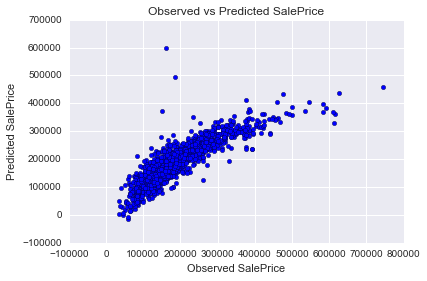

In [172]:
# Observed vs Fitted
%matplotlib inline
plt.scatter(train_med['SalePrice'], model_1.fittedvalues)
plt.ylabel('Predicted SalePrice')
plt.xlabel('Observed SalePrice')
plt.title('Observed vs Predicted SalePrice')

In [173]:
has_rank = [col for col in train if 'TA' in list(train[col])]

In [174]:
dic_num = {'None': 0, 'Po': 1, 'Fa': 2, 'TA': 3, 'Gd': 4, 'Ex': 5}

In [175]:
train_c2n = train.copy()

In [176]:
train_c2n['SubClass'] = train_c2n['SubClass'].astype('category')

In [177]:
# for the key (the key is neighborhood in this case), and the group object (group is LotFrontage grouped by Neighborhood) 
# associated with it...
for key,group in gb_neigh_LF:
    # find where we are both simultaneously missing values and where the key exists
    lot_f_nulls_nei = train['LotFrontage'].isnull() & (train['Neighborhood'] == key)
    # fill in those blanks with the median of the key's group object
    train_c2n.loc[lot_f_nulls_nei,'LotFrontage'] = group.median()

In [178]:
for col in has_rank:
    train_c2n[col+'_2num'] = train_c2n[col].map(dic_num)

In [179]:
train_c2n = pd.get_dummies(train_c2n)

In [180]:
train_cols = train_c2n.select_dtypes(include=['number']).columns
train_c2n = train_c2n[train_cols]

In [181]:
train_c2n = train_c2n.fillna(train_c2n.median())

In [182]:
#xgb_test = XGBRegressor(learning_rate=0.05,n_estimators=500,max_depth=3,colsample_bytree=0.4)
#cv_score = cross_val_score(xgb_test, train_c2n.drop(['SalePrice','index'], axis = 1), train_c2n['SalePrice'], cv = 5, n_jobs=-1)

In [183]:
#print('CV Score is: '+ str(np.mean(cv_score)))

In [184]:
X = train_c2n[['GrLivArea', 'OverallQual', 'YearBuilt', 'GarageArea','LotArea']]
y = train_c2n['SalePrice']

X_test = test_d[['GrLivArea', 'OverallQual', 'YearBuilt', 'GarageArea','LotArea']]

## fit a OLS model with intercept
model_2 = smf.OLS(y, X).fit()

print(model_2.summary())

#Convert the array predictions to a data frame then merge with the index for the test data to create your file
test_predictions = model_2.predict(X_test)
print(test_predictions)
d = {'p_saleprice': test_predictions}
df1 = test_d[['index']]
df2=pd.DataFrame(data=d)
your_file = pd.concat([df1,df2],axis = 1, join_axes=[df1.index])
print(your_file)

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.961
Model:                            OLS   Adj. R-squared:                  0.961
Method:                 Least Squares   F-statistic:                 1.007e+04
Date:                Sun, 22 Oct 2017   Prob (F-statistic):               0.00
Time:                        20:48:03   Log-Likelihood:                -24428.
No. Observations:                2039   AIC:                         4.887e+04
Df Residuals:                    2034   BIC:                         4.889e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
GrLivArea      45.4335      2.216     20.506      

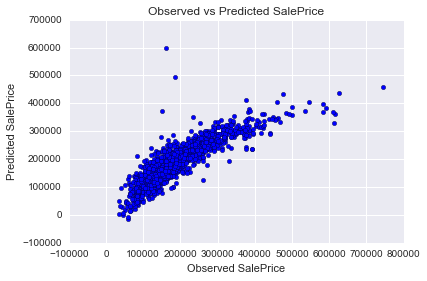

In [185]:
# Observed vs Fitted
%matplotlib inline
plt.scatter(train_c2n['SalePrice'], model_2.fittedvalues)
plt.ylabel('Predicted SalePrice')
plt.xlabel('Observed SalePrice')
plt.title('Observed vs Predicted SalePrice')

In [186]:
from statistics import mode

In [187]:
low_var_cat = [col for col in train.select_dtypes(exclude=['number']) if 1 - sum(train[col] == mode(train[col]))/len(train) < 0.03]
low_var_cat

['Street', 'Utilities', 'Condition2', 'RoofMat', 'Heating']

In [188]:
has_rank = [col for col in train if 'TA' in list(train[col])]

In [189]:
dic_num = {'None': 0, 'Po': 1, 'Fa': 2, 'TA': 3, 'Gd': 4, 'Ex': 5}

In [190]:
train_col = train.copy()

In [191]:
train_col = train_col.drop(['Street', 'Utilities', 'Condition2', 'RoofMat', 'Heating'], axis = 1)

In [192]:
train_col.columns

Index(['SubClass', 'Zoning', 'LotFrontage', 'LotArea', 'Alley', 'LotShape',
       'LandContour', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1',
       'BldgType', 'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt',
       'YearRemodel', 'RoofStyle', 'Exterior1', 'Exterior2', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'HeatingQC',
       'CentralAir', 'Electrical', 'FirstFlrSF', 'SecondFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd',
       'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType', 'GarageYrBlt',
       'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond',
       'PavedDrive', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch',
       'ThreeSsnPorch', 'Scr

In [193]:
train_col['SubClass'] = train_col['SubClass'].astype('category')

In [194]:
# for the key (the key is neighborhood in this case), and the group object (group is LotFrontage grouped by Neighborhood) 
# associated with it...
for key,group in gb_neigh_LF:
    # find where we are both simultaneously missing values and where the key exists
    lot_f_nulls_nei = train['LotFrontage'].isnull() & (train['Neighborhood'] == key)
    # fill in those blanks with the median of the key's group object
    train_col.loc[lot_f_nulls_nei,'LotFrontage'] = group.median()

In [195]:
for col in has_rank:
    train_col[col+'_2num'] = train_col[col].map(dic_num)

In [196]:
train_col = pd.get_dummies(train_col)

In [197]:
train_cols = train_col.select_dtypes(include=['number']).columns
train_col = train_col[train_cols]

In [198]:
train_col = train_col.fillna(train_col.median())

In [199]:
#xgb_test = XGBRegressor(learning_rate=0.05,n_estimators=500,max_depth=3,colsample_bytree=0.4)
#cv_score = cross_val_score(xgb_test, train_col.drop(['SalePrice','index'], axis = 1), train_col['SalePrice'], cv = 5, n_jobs=-1)

In [200]:
#print('CV Score is: '+ str(np.mean(cv_score)))

In [201]:
X = train_col[['GrLivArea', 'OverallQual', 'YearBuilt', 'GarageArea','LotArea']]
y = train_col['SalePrice']

X_test = test_d[['GrLivArea', 'OverallQual', 'YearBuilt', 'GarageArea','LotArea']]

## fit a OLS model with intercept
model_3 = smf.OLS(y, X).fit()

print(model_3.summary())

#Convert the array predictions to a data frame then merge with the index for the test data to create your file
test_predictions = model_3.predict(X_test)
print(test_predictions)
d = {'p_saleprice': test_predictions}
df1 = test_d[['index']]
df2=pd.DataFrame(data=d)
your_file = pd.concat([df1,df2],axis = 1, join_axes=[df1.index])
print(your_file)

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.961
Model:                            OLS   Adj. R-squared:                  0.961
Method:                 Least Squares   F-statistic:                 1.007e+04
Date:                Sun, 22 Oct 2017   Prob (F-statistic):               0.00
Time:                        20:48:05   Log-Likelihood:                -24428.
No. Observations:                2039   AIC:                         4.887e+04
Df Residuals:                    2034   BIC:                         4.889e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
GrLivArea      45.4335      2.216     20.506      

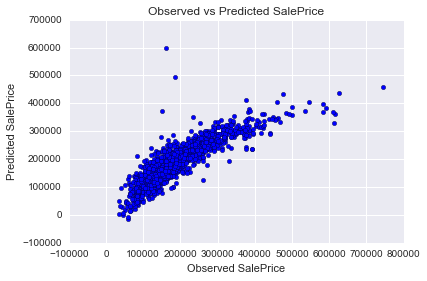

In [202]:
# Observed vs Fitted
%matplotlib inline
plt.scatter(train_col['SalePrice'], model_3.fittedvalues)
plt.ylabel('Predicted SalePrice')
plt.xlabel('Observed SalePrice')
plt.title('Observed vs Predicted SalePrice')

In [203]:
cat_hasnull = [col for col in train.select_dtypes(['object']) if train[col].isnull().any()]
cat_hasnull

['Alley',
 'MasVnrType',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'Electrical',
 'FireplaceQu',
 'GarageType',
 'GarageFinish',
 'GarageQual',
 'GarageCond',
 'PoolQC',
 'Fence',
 'MiscFeature']

In [204]:
cat_hasnull.remove('Electrical')

In [205]:
mode_elec = mode(train['Electrical'])
mode_elec

'SBrkr'

In [206]:
has_rank = [col for col in train if 'TA' in list(train[col])]

In [207]:
dic_num = {'None': 0, 'Po': 1, 'Fa': 2, 'TA': 3, 'Gd': 4, 'Ex': 5}

In [208]:
cat_hasnull = [col for col in train.select_dtypes(['object']) if train[col].isnull().any()]

In [209]:
cat_hasnull.remove('Electrical')

In [210]:
train_none = train.copy()

In [211]:
train_none = train_none.drop(['Street', 'Utilities', 'Condition2', 'RoofMat', 'Heating'], axis = 1)

In [212]:
train_none['SubClass'] = train_none['SubClass'].astype('category')

In [213]:
for col in cat_hasnull:
    null_idx = train_none[col].isnull()
    train_none.loc[null_idx, col] = 'None'

In [214]:
null_idx_el = train_none['Electrical'].isnull()
train_none.loc[null_idx_el, 'Electrical'] = 'SBrkr'

In [215]:
# for the key (the key is neighborhood in this case), and the group object (group is LotFrontage grouped by Neighborhood) 
# associated with it...
for key,group in gb_neigh_LF:
    # find where we are both simultaneously missing values and where the key exists
    lot_f_nulls_nei = train['LotFrontage'].isnull() & (train['Neighborhood'] == key)
    # fill in those blanks with the median of the key's group object
    train_none.loc[lot_f_nulls_nei,'LotFrontage'] = group.median()

In [216]:
for col in has_rank:
    train_none[col+'_2num'] = train_none[col].map(dic_num)

In [217]:
train_none = pd.get_dummies(train_none)

In [218]:
train_cols = train_none.select_dtypes(include=['number']).columns
train_none = train_none[train_cols]

In [219]:
train_none = train_none.fillna(train_none.median())

In [220]:
#xgb_test = XGBRegressor(learning_rate=0.05,n_estimators=500,max_depth=3,colsample_bytree=0.4)
#cv_score = cross_val_score(xgb_test, train_none.drop(['SalePrice','index'], axis = 1), train_none['SalePrice'], cv = 5, n_jobs=-1)

In [221]:
#print('CV Score is: '+ str(np.mean(cv_score)))

In [222]:
X = train_none[['GrLivArea', 'OverallQual', 'YearBuilt', 'GarageArea','LotArea','TotalBsmtSF']]
y = train_none['SalePrice']

X_test = test_d[['GrLivArea', 'OverallQual', 'YearBuilt', 'GarageArea','LotArea','TotalBsmtSF']]

## fit a OLS model with intercept
model_4 = smf.OLS(y, X).fit()

print(model_4.summary())

#Convert the array predictions to a data frame then merge with the index for the test data to create your file
test_predictions = model_4.predict(X_test)
print(test_predictions)
d = {'p_saleprice': test_predictions}
df1 = test_d[['index']]
df2=pd.DataFrame(data=d)
your_file = pd.concat([df1,df2],axis = 1, join_axes=[df1.index])
print(your_file)

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.964
Model:                            OLS   Adj. R-squared:                  0.964
Method:                 Least Squares   F-statistic:                     9128.
Date:                Sun, 22 Oct 2017   Prob (F-statistic):               0.00
Time:                        20:48:06   Log-Likelihood:                -24345.
No. Observations:                2039   AIC:                         4.870e+04
Df Residuals:                    2033   BIC:                         4.874e+04
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
GrLivArea      42.7649      2.137     20.009      

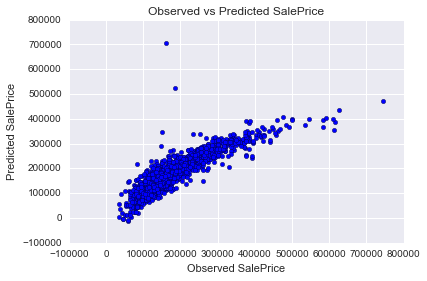

In [223]:
# Observed vs Fitted
%matplotlib inline
plt.scatter(train_none['SalePrice'], model_4.fittedvalues)
plt.ylabel('Predicted SalePrice')
plt.xlabel('Observed SalePrice')
plt.title('Observed vs Predicted SalePrice')

In [224]:
model_4.params

GrLivArea         42.764930
OverallQual    25664.244874
YearBuilt        -54.523492
GarageArea        60.906945
LotArea            0.611598
TotalBsmtSF       31.371069
dtype: float64

In [225]:
cols_skew = [col for col in train_none if '_2num' in col or '_' not in col]
train_none[cols_skew].skew()

LotFrontage          1.315086
LotArea             13.440253
OverallQual          0.236762
OverallCond          0.630925
YearBuilt           -0.573914
YearRemodel         -0.441998
MasVnrArea           2.613523
BsmtFinSF1           1.483029
BsmtFinSF2           4.165896
BsmtUnfSF            0.942611
TotalBsmtSF          1.112733
FirstFlrSF           1.330116
SecondFlrSF          0.876115
LowQualFinSF        10.216197
GrLivArea            1.300669
BsmtFullBath         0.644459
BsmtHalfBath         4.040926
FullBath             0.122252
HalfBath             0.695178
BedroomAbvGr         0.295567
KitchenAbvGr         4.413040
TotRmsAbvGrd         0.706435
Fireplaces           0.808304
GarageYrBlt         -0.275665
GarageCars          -0.218393
GarageArea           0.263416
WoodDeckSF           1.592101
OpenPorchSF          2.587807
EnclosedPorch        3.288317
ThreeSsnPorch       10.902690
ScreenPorch          4.005293
PoolArea            15.522422
MiscVal             20.189763
MoSold    

In [226]:
cols_unskew = train_none[cols_skew].columns[abs(train_none[cols_skew].skew()) > 1]

In [227]:
train_unskew = train_none.copy()

In [228]:
for col in cols_unskew:
    train_unskew[col] = np.log1p(train_none[col])

In [229]:
corrmat = train_none.corr()
indices = np.where(corrmat.abs() > 0.8)
indices = [(corrmat.index[x], corrmat.columns[y], corrmat.values[x][y]) for x, y in zip(*indices)
                                        if x != y and x < y]
high_corr = pd.DataFrame(indices, columns=['Feature1', 'Feature2', 'Correlation'])
high_corr.sort_values('Correlation')

,Feature1,Feature2,Correlation
60,CentralAir_N,CentralAir_Y,-1.000000
26,PoolQC_2num,PoolQC_None,-0.972605
71,MiscFeature_None,MiscFeature_Shed,-0.972338
14,FireplaceQu_2num,FireplaceQu_None,-0.954195
22,GarageCond_2num,GarageFinish_None,-0.949340
24,GarageCond_2num,GarageCond_None,-0.949340
23,GarageCond_2num,GarageQual_None,-0.949340
21,GarageCond_2num,GarageType_None,-0.945097
36,LandSlope_Gtl,LandSlope_Mod,-0.944058
35,LotShape_IR1,LotShape_Reg,-0.943981


In [230]:
# Make DataFrame with just the highly correlated features
test_u = high_corr[:]['Feature1']
test_u = test_u.append(high_corr[:]['Feature2'], ignore_index=True)
test_u = test_u.append(pd.Series(['','SalePrice']))
test_u = test_u.drop_duplicates()
df_train_high_corr = train_none.filter(items=test)
df_train_high_corr.head()

,index,SalePrice,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodel,MasVnrArea,BsmtFinSF1,...,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,ThreeSsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold
0,2,236500,70.0,11838,8,5,2001,2001,0.0,0.0,...,522,202,151,0,0,0,0,0,6,2009
1,3,187000,70.0,8304,6,5,1997,1998,0.0,0.0,...,688,150,165,0,0,0,0,0,7,2006
2,5,113000,58.0,6380,5,6,1922,1950,0.0,0.0,...,280,0,0,116,0,0,0,0,8,2006
3,6,190000,80.0,14803,6,5,1971,1971,252.0,416.0,...,495,0,66,0,0,0,0,0,6,2006
4,8,150000,91.0,11375,6,5,1954,1995,0.0,736.0,...,494,81,0,280,0,0,0,0,10,2007


In [231]:
# See how correlated they are to sales price
df_train_high_corr.corr()['SalePrice'].sort_values(ascending=False)

SalePrice        1.000000
OverallQual      0.799837
GrLivArea        0.701734
GarageCars       0.651208
GarageArea       0.645954
FirstFlrSF       0.633116
TotalBsmtSF      0.631399
YearBuilt        0.557469
FullBath         0.536306
YearRemodel      0.522784
MasVnrArea       0.500541
GarageYrBlt      0.490418
TotRmsAbvGrd     0.489947
Fireplaces       0.487527
BsmtFinSF1       0.446513
LotFrontage      0.357270
WoodDeckSF       0.336688
OpenPorchSF      0.308081
BsmtFullBath     0.289762
HalfBath         0.286912
LotArea          0.262951
SecondFlrSF      0.249058
BsmtUnfSF        0.156000
BedroomAbvGr     0.128759
ScreenPorch      0.099817
PoolArea         0.081070
MoSold           0.031991
BsmtFinSF2       0.019153
ThreeSsnPorch    0.015316
index           -0.010446
MiscVal         -0.015998
YrSold          -0.024561
LowQualFinSF    -0.038653
BsmtHalfBath    -0.044334
OverallCond     -0.109245
KitchenAbvGr    -0.109632
EnclosedPorch   -0.133154
Name: SalePrice, dtype: float64

In [232]:
X = train_none[['OverallQual','GrLivArea','GarageArea','TotalBsmtSF','YearBuilt','FullBath',
                'YearRemodel','MasVnrArea','GarageYrBlt','TotRmsAbvGrd','Fireplaces','LotFrontage',
                'WoodDeckSF','BsmtFullBath','LotArea','ScreenPorch','YrSold','KitchenAbvGr']]
y = train_none['SalePrice']

X_test = test_d[['OverallQual','GrLivArea','GarageArea','TotalBsmtSF','YearBuilt','FullBath',
                 'YearRemodel','MasVnrArea','GarageYrBlt','TotRmsAbvGrd','Fireplaces','LotFrontage',
                 'WoodDeckSF','BsmtFullBath','LotArea','ScreenPorch','YrSold','KitchenAbvGr']]

## fit a OLS model with intercept
model_0 = smf.OLS(y, X).fit()

print(model_0.summary())

#Convert the array predictions to a data frame then merge with the index for the test data to create your file
test_predictions = model_0.predict(X_test)
print(test_predictions)
d = {'p_saleprice': test_predictions}
df1 = test_d[['index']]
df2=pd.DataFrame(data=d)
your_file = pd.concat([df1,df2],axis = 1, join_axes=[df1.index])
print(your_file)

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.971
Model:                            OLS   Adj. R-squared:                  0.971
Method:                 Least Squares   F-statistic:                     3731.
Date:                Sun, 22 Oct 2017   Prob (F-statistic):               0.00
Time:                        20:48:07   Log-Likelihood:                -24138.
No. Observations:                2039   AIC:                         4.831e+04
Df Residuals:                    2021   BIC:                         4.841e+04
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
OverallQual   1.805e+04    907.452     19.894   

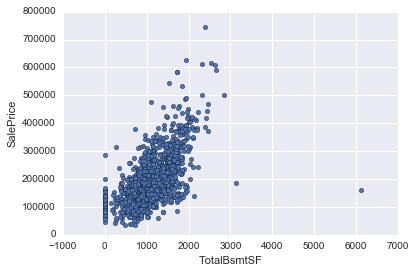

In [233]:
#bivariate analysis saleprice/grlivarea
var = 'TotalBsmtSF'
data = pd.concat([train_none['SalePrice'], train_none[var]], axis=1)
data.plot.scatter(x=var, y='SalePrice', ylim=(0,800000));

In [234]:
train_drop_high = train_none.drop(train_none[train_none['SalePrice'] >= 500000].index)
train_drop_high = train_drop_high.drop(train_drop_high[train_drop_high['TotalBsmtSF'] >= 6000].index)
train_drop_high = train_drop_high.drop(train_drop_high[train_drop_high['GrLivArea'] >= 4000].index)
train_drop_high = train_drop_high.drop(train_drop_high[train_drop_high['LotArea'] >= 100000].index)
train_drop_high = train_drop_high.drop(train_drop_high[train_drop_high['MasVnrArea'] >= 1000].index)
train_drop_high = train_drop_high.drop(train_drop_high[train_drop_high['KitchenAbvGr'] >= 3].index)

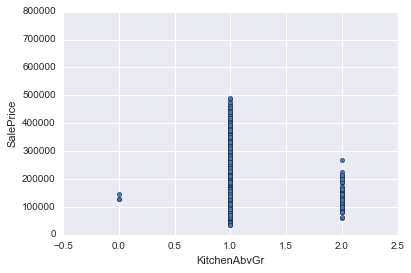

In [235]:
#bivariate analysis saleprice/grlivarea
var = 'KitchenAbvGr'
data = pd.concat([train_drop_high['SalePrice'], train_drop_high[var]], axis=1)
data.plot.scatter(x=var, y='SalePrice', ylim=(0,800000));

In [241]:
X = train_drop_high[['GrLivArea', 'OverallQual', 'YearBuilt', 'GarageArea','LotArea','TotalBsmtSF']]
y = train_drop_high['SalePrice']

X_test = test_d[['GrLivArea', 'OverallQual', 'YearBuilt', 'GarageArea','LotArea','TotalBsmtSF']]

## fit a OLS model with intercept
model_0_1 = smf.OLS(y, X).fit()

print(model_0_1.summary())

#Convert the array predictions to a data frame then merge with the index for the test data to create your file
test_predictions = model_0_1.predict(X_test)
print(test_predictions)
d = {'p_saleprice': test_predictions}
df1 = test_d[['index']]
df2=pd.DataFrame(data=d)
your_file = pd.concat([df1,df2],axis = 1, join_axes=[df1.index])
print(your_file)

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.975
Model:                            OLS   Adj. R-squared:                  0.975
Method:                 Least Squares   F-statistic:                 1.301e+04
Date:                Sun, 22 Oct 2017   Prob (F-statistic):               0.00
Time:                        20:48:46   Log-Likelihood:                -23610.
No. Observations:                2012   AIC:                         4.723e+04
Df Residuals:                    2006   BIC:                         4.727e+04
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
GrLivArea      42.9072      1.852     23.173      

In [242]:
model_0_1.params

GrLivArea         42.907245
OverallQual    23925.067709
YearBuilt        -54.205937
GarageArea        56.570916
LotArea            1.230910
TotalBsmtSF       36.266345
dtype: float64

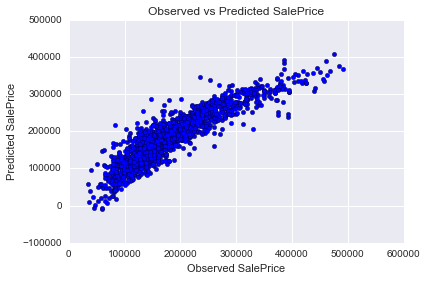

In [243]:
# Observed vs Fitted
%matplotlib inline
plt.scatter(train_drop_high['SalePrice'], model_0_1.fittedvalues)
plt.ylabel('Predicted SalePrice')
plt.xlabel('Observed SalePrice')
plt.title('Observed vs Predicted SalePrice')

In [238]:
X = train_drop_high[['OverallQual','GrLivArea','GarageArea','TotalBsmtSF','YearBuilt',
                'YearRemodel','MasVnrArea','Fireplaces','LotFrontage',
                'BsmtFullBath','LotArea','YrSold','KitchenAbvGr']]
y = train_drop_high['SalePrice']

X_test = test_d[['OverallQual','GrLivArea','GarageArea','TotalBsmtSF','YearBuilt',
                 'YearRemodel','MasVnrArea','Fireplaces','LotFrontage',
                 'BsmtFullBath','LotArea','YrSold','KitchenAbvGr']]

## fit a OLS model with intercept
model_0_2 = smf.OLS(y, X).fit()

print(model_0_2.summary())

#Convert the array predictions to a data frame then merge with the index for the test data to create your file
test_predictions = model_0_2.predict(X_test)
print(test_predictions)
d = {'p_saleprice': test_predictions}
df1 = test_d[['index']]
df2=pd.DataFrame(data=d)
your_file = pd.concat([df1,df2],axis = 1, join_axes=[df1.index])
print(your_file)
your_file.to_csv('neighborhood_predictions.csv', index=False)

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.981
Model:                            OLS   Adj. R-squared:                  0.981
Method:                 Least Squares   F-statistic:                     7866.
Date:                Sun, 22 Oct 2017   Prob (F-statistic):               0.00
Time:                        20:48:08   Log-Likelihood:                -23341.
No. Observations:                2012   AIC:                         4.671e+04
Df Residuals:                    1999   BIC:                         4.678e+04
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
OverallQual   1.617e+04    724.621     22.319   

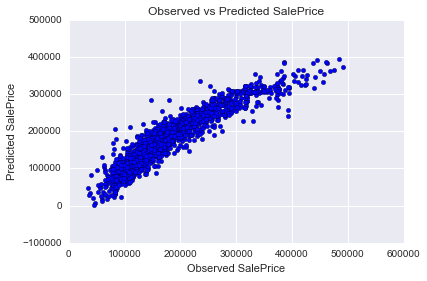

In [239]:
# Observed vs Fitted
%matplotlib inline
plt.scatter(train_drop_high['SalePrice'], model_0_2.fittedvalues)
plt.ylabel('Predicted SalePrice')
plt.xlabel('Observed SalePrice')
plt.title('Observed vs Predicted SalePrice')